# Donor Data Analysis (University of San Francisco)

In [1]:
import pandas as pd

# Load the CSV file
file_path = 'AlumniGiving - DonationHistory.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111336 entries, 0 to 111335
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ACCOUNT_ID           111336 non-null  object 
 1   NUMBER_OF_DONATIONS  111336 non-null  int64  
 2   VALUE_OF_DONATIONS   111336 non-null  float64
 3   CITY                 93361 non-null   object 
 4   STATE                93361 non-null   object 
 5   ZIP                  93361 non-null   object 
 6   MI                   12128 non-null   object 
 7   ALUMNI_TYPE          111336 non-null  object 
 8   UG_CLASS_YEAR        111336 non-null  int64  
 9   UG_SCHOOL            65930 non-null   object 
 10  GRAD_DEGREE          50948 non-null   object 
 11  GRAD_CLASS_YEAR      50947 non-null   float64
 12  GRAD_SCHOOL          50921 non-null   object 
 13  GENDER               111336 non-null  object 
 14  MARRIED_TO_ALUM      111336 non-null  object 
 15  ROTC             

(           ACCOUNT_ID  NUMBER_OF_DONATIONS  VALUE_OF_DONATIONS         CITY  \
 0  003o000000pO6zhAAC                    0                 0.0  Gainesville   
 1  003o000000pOSIxAAO                    1               100.0     Pasadena   
 2  003o000000pNvhHAAS                    4              1700.0   San Rafael   
 3  003o000000q0hl1AAA                    0                 0.0  San Antonio   
 4  003o000000pOZe9AAG                    5               500.0  Westborough   
 
   STATE         ZIP   MI    ALUMNI_TYPE  UG_CLASS_YEAR           UG_SCHOOL  \
 0    FL  32605-6400  NaN       Graduate           1969                 NaN   
 1    CA  91105-1515  NaN       Graduate           1968                 NaN   
 2    CA  94901-2478  NaN       Graduate           1964                 NaN   
 3    TX  78232-4154    T  Undergraduate           1967   School of Nursing   
 4    MA        1581  NaN  Undergraduate           1964  School of Business   
 
   GRAD_DEGREE  GRAD_CLASS_YEAR           

In [2]:
data['IS_DONOR'] = data['NUMBER_OF_DONATIONS'] > 0
data['SCHOOL'] = data['UG_SCHOOL'].combine_first(data['GRAD_SCHOOL'])
data.head()

,ACCOUNT_ID,NUMBER_OF_DONATIONS,VALUE_OF_DONATIONS,CITY,STATE,ZIP,MI,ALUMNI_TYPE,UG_CLASS_YEAR,UG_SCHOOL,GRAD_DEGREE,GRAD_CLASS_YEAR,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC,IS_DONOR,SCHOOL
0,003o000000pO6zhAAC,0,0.0,Gainesville,FL,32605-6400,NaN,Graduate,1969,NaN,MS,1969.0,College of Arts and Sci (Sci),M,N,0,0,False,College of Arts and Sci (Sci)
1,003o000000pOSIxAAO,1,100.0,Pasadena,CA,91105-1515,NaN,Graduate,1968,NaN,JD,1968.0,School of Law,M,N,0,1,True,School of Law
2,003o000000pNvhHAAS,4,1700.0,San Rafael,CA,94901-2478,NaN,Graduate,1964,NaN,JD,1964.0,School of Law,M,N,0,0,True,School of Law
3,003o000000q0hl1AAA,0,0.0,San Antonio,TX,78232-4154,T,Undergraduate,1967,School of Nursing,NaN,NaN,NaN,F,N,0,0,False,School of Nursing
4,003o000000pOZe9AAG,5,500.0,Westborough,MA,1581,NaN,Undergraduate,1964,School of Business,NaN,NaN,NaN,M,N,0,1,True,School of Business


## Data Cleaning

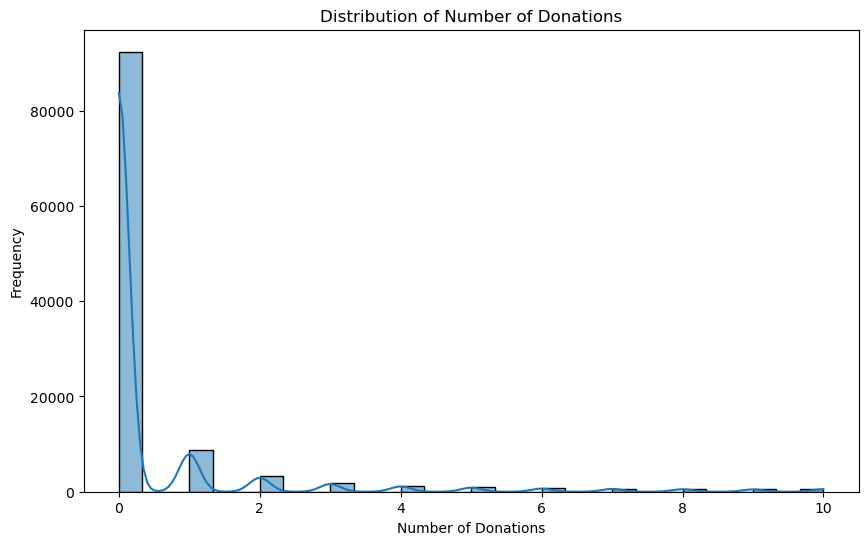

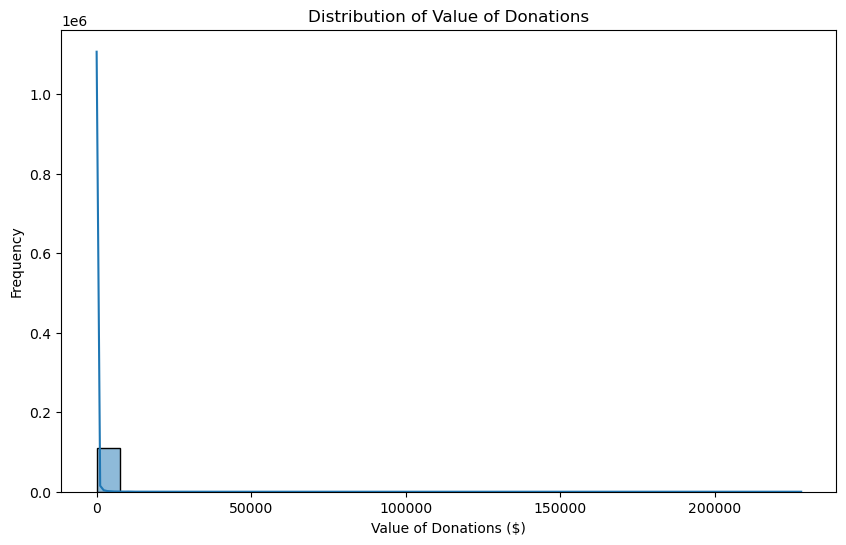

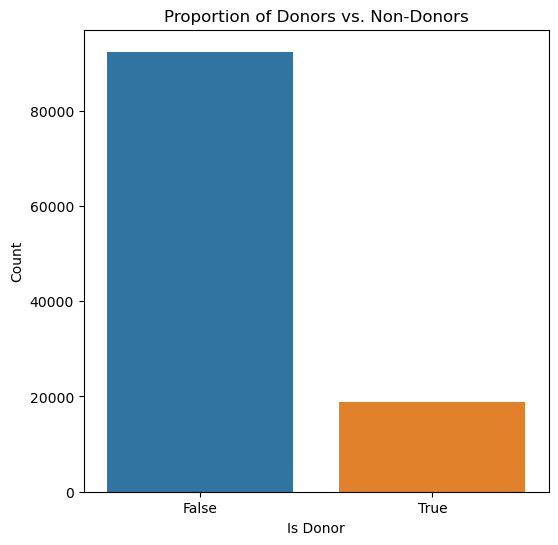

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fill missing values
data['CITY'].fillna('Unknown', inplace=True)
data['STATE'].fillna('Unknown', inplace=True)
data['ZIP'].fillna('Unknown', inplace=True)
data['MI'].fillna('Unknown', inplace=True)
data['UG_SCHOOL'].fillna('Unknown', inplace=True)
data['GRAD_DEGREE'].fillna('Unknown', inplace=True)
data['GRAD_CLASS_YEAR'].fillna(0, inplace=True)
data['GRAD_SCHOOL'].fillna('Unknown', inplace=True)

# Convert categorical variables to numeric
data['GENDER'] = data['GENDER'].map({'M': 1, 'F': 0})
data['MARRIED_TO_ALUM'] = data['MARRIED_TO_ALUM'].map({'Y': 1, 'N': 0})

# Clean ZIP code to keep only the first 5 characters
data['ZIP'] = data['ZIP'].apply(lambda x: x[:5] if isinstance(x, str) else x)

# Identify if the person provided MI and create a new column for it
data['MI_PROVIDED'] = data['MI'].apply(lambda x: 1 if x != 'Unknown' else 0)

# Group rare CITY values into "Other"
city_counts = data['CITY'].value_counts()
threshold = 10  # Group cities with less than 10 occurrences
data['CITY'] = data['CITY'].apply(lambda x: x if city_counts[x] >= threshold else 'Other')

# Check the distribution of number of donations
plt.figure(figsize=(10, 6))
sns.histplot(data['NUMBER_OF_DONATIONS'], bins=30, kde=True)
plt.title('Distribution of Number of Donations')
plt.xlabel('Number of Donations')
plt.ylabel('Frequency')
plt.show()

# Check the distribution of value of donations
plt.figure(figsize=(10, 6))
sns.histplot(data['VALUE_OF_DONATIONS'], bins=30, kde=True)
plt.title('Distribution of Value of Donations')
plt.xlabel('Value of Donations ($)')
plt.ylabel('Frequency')
plt.show()

# Proportion of donors vs. non-donors
data['DONOR'] = data['NUMBER_OF_DONATIONS'] > 0
plt.figure(figsize=(6, 6))
sns.countplot(x='DONOR', data=data)
plt.title('Proportion of Donors vs. Non-Donors')
plt.xlabel('Is Donor')
plt.ylabel('Count')
plt.show()

# Visualization

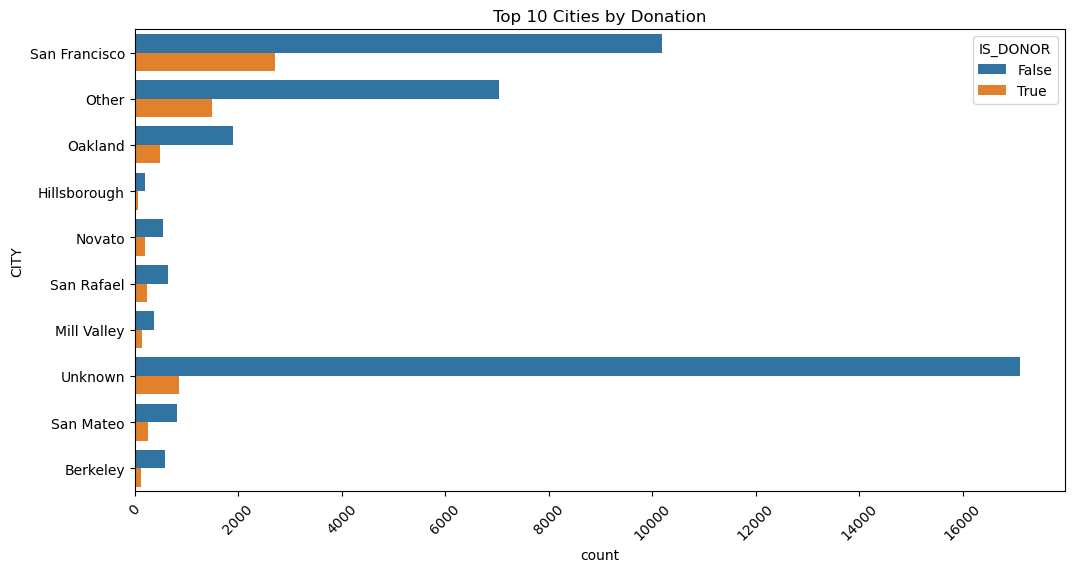

In [4]:
# 2. Relationship between city and donation amount
# Calculate total donation amount by city
city_donation_total = data.groupby('CITY')['VALUE_OF_DONATIONS'].sum().reset_index()

# Sort cities by donation amount and select top 10
top_10_cities = city_donation_total.sort_values(by='VALUE_OF_DONATIONS', ascending=False).head(10)

# Filter the original dataframe to include only the top 10 cities
data_top_10_cities = data[data['CITY'].isin(top_10_cities['CITY'])]

# Plot the relationship between top 10 cities and donation amount
plt.figure(figsize=(12, 6))
sns.countplot(y='CITY', hue = "IS_DONOR", data=data_top_10_cities, order=top_10_cities['CITY'])
plt.title('Top 10 Cities by Donation')
plt.xticks(rotation=45)
plt.show()

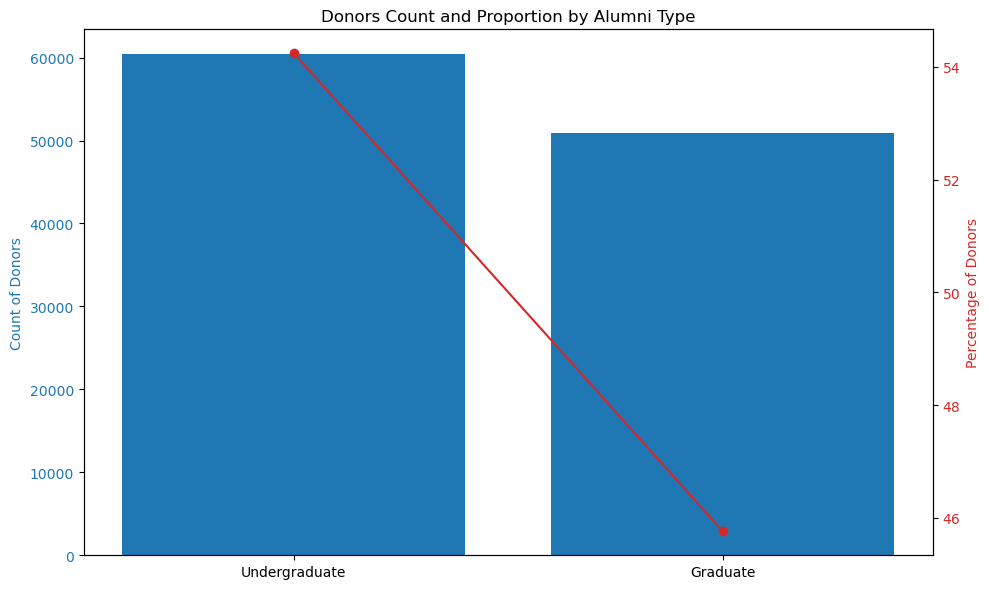

In [5]:
# Calculate the count and proportion of donors within each alumni type
donor_counts = data['ALUMNI_TYPE'].value_counts()
total_donors = len(data)
donor_proportions = (donor_counts / total_donors) * 100

# Create subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot count of donors within each alumni type
color = 'tab:blue'
ax1.bar(donor_counts.index, donor_counts.values, color=color)
ax1.set_ylabel('Count of Donors', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Donors Count and Proportion by Alumni Type')

# Create a second y-axis to plot proportion of donors
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(donor_proportions.index, donor_proportions.values, color=color, marker='o')
ax2.set_ylabel('Percentage of Donors', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

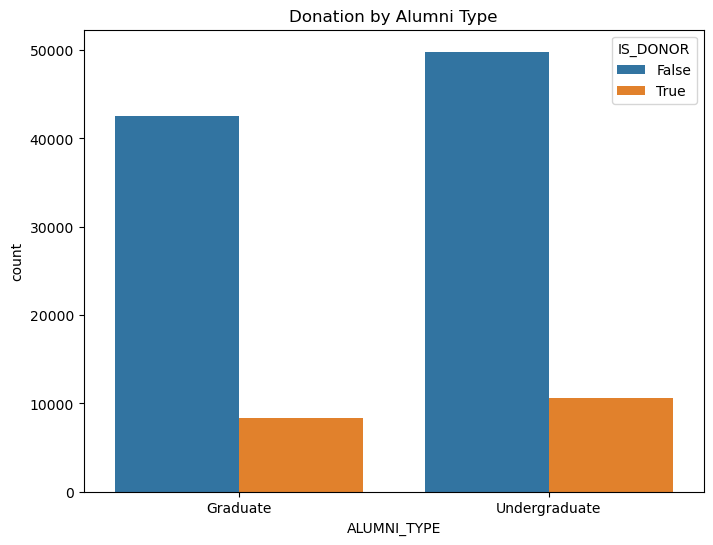

In [6]:
# Relationship within each alumni type

plt.figure(figsize=(8, 6))
sns.countplot(x='ALUMNI_TYPE', hue = 'IS_DONOR', data=data)

plt.title('Donation by Alumni Type')
plt.show()

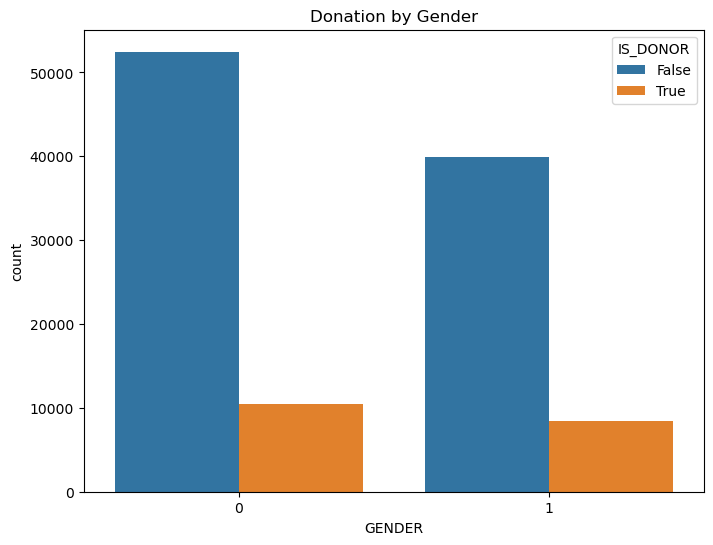

In [7]:
# 4. Relationship between gender and donation amount
plt.figure(figsize=(8, 6))
sns.countplot(x='GENDER', hue = 'IS_DONOR', data=data)
plt.title('Donation by Gender')
plt.show()

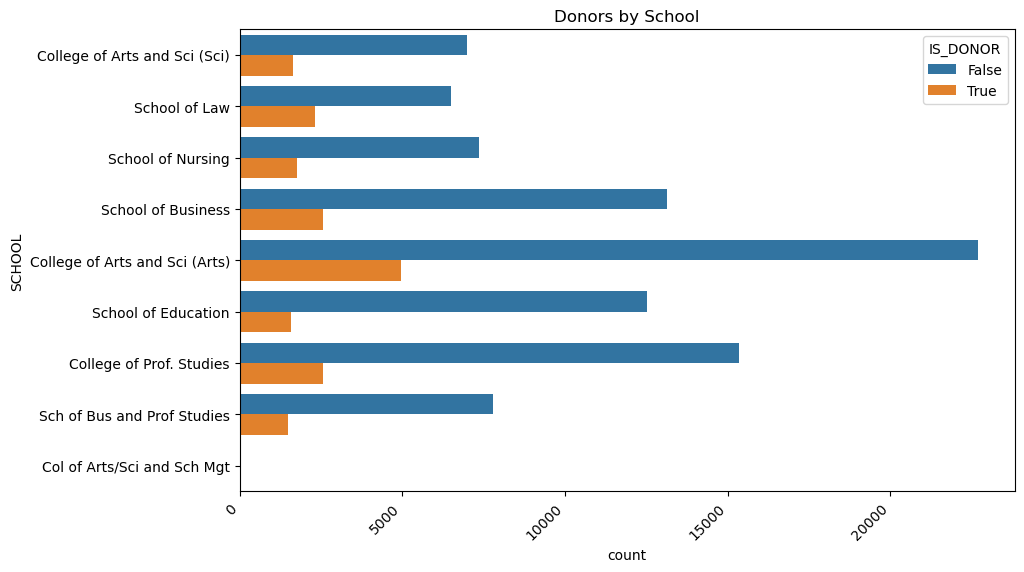

In [8]:
# Plot the relationship between UG school and donors
filtered_data = data[~data['SCHOOL'].isin(['Continuing Education', 'Not used in standing', None]) & data['SCHOOL'].notna()]

plt.figure(figsize=(10, 6))
sns.countplot(y='SCHOOL', hue="IS_DONOR", data=filtered_data)
plt.title('Donors by School')
plt.xticks(rotation=45, ha='right')
plt.show()

# Predictive Modeling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample

# Feature Engineering
data['YEARS_SINCE_UG'] = 2024 - data['UG_CLASS_YEAR']
data['YEARS_SINCE_GRAD'] = 2024 - data['GRAD_CLASS_YEAR']

# Selecting features for the model, including ZIP, CITY, and MI_PROVIDED
features = [
    'YEARS_SINCE_UG', 'YEARS_SINCE_GRAD', 'GENDER', 'MARRIED_TO_ALUM', 
    'ROTC', 'JC', 'ALUMNI_TYPE', 'ZIP', 'CITY', 'MI_PROVIDED'
]

X = data[features]
y = data['DONOR']

# Combine X and y into a single dataframe for downsampling
data_combined = pd.concat([X, y], axis=1)

# Separate majority and minority classes
majority_class = data_combined[data_combined['DONOR'] == False]
minority_class = data_combined[data_combined['DONOR'] == True]

# Downsample majority class
majority_class_downsampled = resample(majority_class, 
                                      replace=False,    # sample without replacement
                                      n_samples=len(minority_class),     # to match minority class
                                      random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
downsampled_data = pd.concat([minority_class, majority_class_downsampled])

# Separate X and y after downsampling
X_downsampled = downsampled_data[features]
y_downsampled = downsampled_data['DONOR']


# 使用Label Encoding对分类变量进行编码
label_encoders = {}
categorical_features = ['ALUMNI_TYPE', 'ZIP', 'CITY']

for col in categorical_features:
    le = LabelEncoder()
    X_downsampled[col] = le.fit_transform(X_downsampled[col])
    label_encoders[col] = le

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


C:\Users\syeda\AppData\Local\Temp\ipykernel_1884\1599590942.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_downsampled[col] = le.fit_transform(X_downsampled[col])
C:\Users\syeda\AppData\Local\Temp\ipykernel_1884\1599590942.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_downsampled[col] = le.fit_transform(X_downsampled[col])
C:\Users\syeda\AppData\Local\Temp\ipykernel_1884\1599590942.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

#### Initialize training model

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [12]:
# Initialize models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

# Train models
log_reg.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)
gb_clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

#### Evaluation model

In [13]:
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score, confusion_matrix, f1_score, classification_report, accuracy_score, roc_auc_score
# Predict and evaluate models
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_clf,
    'Gradient Boosting': gb_clf
}

for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Generate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print(f'Balanced Accuarcy:{balanced_acc:.4f} ')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("\n")

Model: Logistic Regression
Confusion Matrix:
 [[2941  867]
 [1939 1824]]
Classification Report:
               precision    recall  f1-score   support

       False       0.60      0.77      0.68      3808
        True       0.68      0.48      0.57      3763

    accuracy                           0.63      7571
   macro avg       0.64      0.63      0.62      7571
weighted avg       0.64      0.63      0.62      7571

Balanced Accuarcy:0.6285 
Accuracy: 0.6294
Precision: 0.6778
Recall: 0.4847
F1 Score: 0.5652
ROC AUC Score: 0.6785


Model: Random Forest
Confusion Matrix:
 [[2414 1394]
 [1492 2271]]
Classification Report:
               precision    recall  f1-score   support

       False       0.62      0.63      0.63      3808
        True       0.62      0.60      0.61      3763

    accuracy                           0.62      7571
   macro avg       0.62      0.62      0.62      7571
weighted avg       0.62      0.62      0.62      7571

Balanced Accuarcy:0.6187 
Accuracy: 0.618

#### Predict non-donors and select the top 10,000 with the highest probability:

## Features

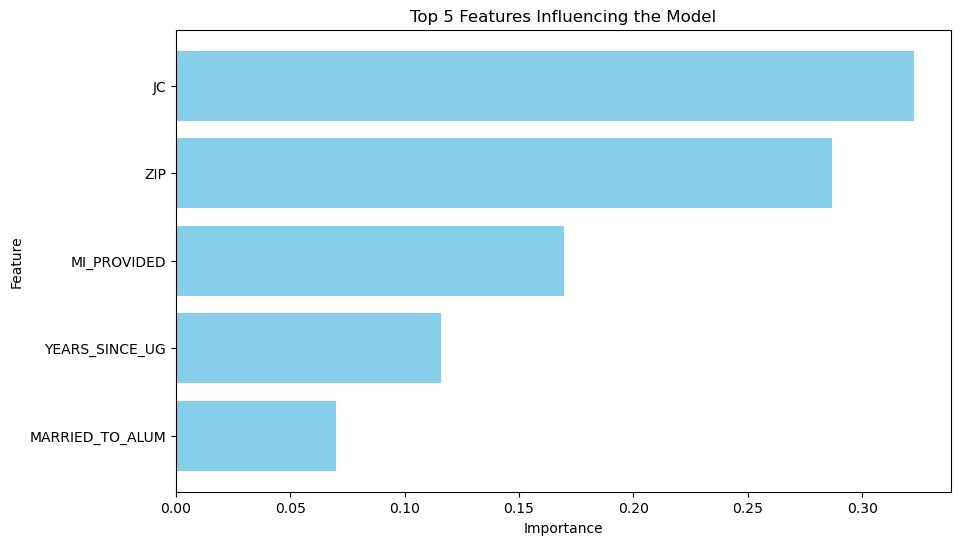

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# Fit the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = gb_clf.feature_importances_

# Create a DataFrame for feature importances
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 5 features
top_5_features = importance_df.head(5)

# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Features Influencing the Model')
plt.gca().invert_yaxis()
plt.show()


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# Assuming scaler, gb_clf, features, categorical_features, and label_encoders are already defined

# Filter non-donors
non_donors = data[data['DONOR'] == False].copy()

# Encode categorical features
for col in categorical_features:
    le = label_encoders[col]
    # Find new labels
    new_labels = set(non_donors[col]) - set(le.classes_)
    # Add new labels to the encoder
    le.classes_ = np.append(le.classes_, list(new_labels))
    non_donors[col] = le.transform(non_donors[col])

# Align columns for scaling
non_donors_X = pd.get_dummies(non_donors[features], drop_first=True)
missing_cols = set(scaler.feature_names_in_) - set(non_donors_X.columns)
for col in missing_cols:
    non_donors_X[col] = 0
non_donors_X = non_donors_X[scaler.feature_names_in_]

# Scale the data
non_donors_scaled = scaler.transform(non_donors_X)
non_donors['PREDICTED_PROB'] = gb_clf.predict_proba(non_donors_scaled)[:, 1]

# Select the top 10,000 non-donors with the highest predicted probabilities
top_10000_non_donors = non_donors.nlargest(10000, 'PREDICTED_PROB')

# Add rank
top_10000_non_donors['RANK'] = top_10000_non_donors['PREDICTED_PROB'].rank(ascending=False, method='first')

# Summary of selected alumni with probability and rank
summary = top_10000_non_donors[['YEARS_SINCE_UG', 'YEARS_SINCE_GRAD', 'GENDER', 'MARRIED_TO_ALUM', 
    'ROTC', 'JC', 'ALUMNI_TYPE', 'ZIP', 'CITY', 'MI_PROVIDED', 'PREDICTED_PROB', 'RANK']]

# Print the summary
print(summary.head())
print(summary.describe())

# Save the summary to a CSV file
summary.to_csv('top_10000_non_donors_summary.csv', index=False)

        YEARS_SINCE_UG  YEARS_SINCE_GRAD  GENDER  MARRIED_TO_ALUM  ROTC  JC  \
45373               45            2024.0       0                1     1   1   
115913              27            2024.0       1                1     0   1   
74485               54              52.0       0                1     0   1   
14790               59            2024.0       1                1     0   1   
14910               58            2024.0       1                1     0   1   

        ALUMNI_TYPE   ZIP  CITY  MI_PROVIDED  PREDICTED_PROB  RANK  
45373             1  3862   684            1        0.967082   1.0  
115913            1  4064   688            1        0.965861   2.0  
74485             0  4009   738            0        0.956883   3.0  
14790             1  4064   688            0        0.955221   4.0  
14910             1  3744   674            0        0.954490   5.0  
       YEARS_SINCE_UG  YEARS_SINCE_GRAD        GENDER  MARRIED_TO_ALUM  \
count    10000.000000      10000.0000